In [1]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_novelty_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-novelty-detection-py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
np.random.seed(42)

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate normal (not abnormal) training observations
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_train

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

In [3]:
# Generate new normal (not abnormal) observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_test

array([[ 2.10733621,  2.16823536],
       [ 2.32491537,  2.31614062],
       [ 1.58669919,  1.71865249],
       [ 2.15451058,  2.15413579],
       [ 2.15451431,  3.15581945],
       [ 2.17126715,  2.34066969],
       [ 2.28620053,  2.19541738],
       [ 1.90541923,  2.22769077],
       [ 1.76815244,  1.92895442],
       [ 1.85439094,  2.02456224],
       [ 2.69439757,  1.43982044],
       [ 2.20587806,  1.51618524],
       [ 1.85842044,  2.32668518],
       [ 2.01928401,  1.67667657],
       [ 1.78540889,  2.20387932],
       [ 1.78089001,  2.06493758],
       [ 2.01367155,  1.8045199 ],
       [ 2.64318323,  2.19017571],
       [ 1.39245722,  2.05593629],
       [ 1.80146406,  2.25573   ],
       [-1.89266379, -1.83176464],
       [-1.67508463, -1.68385938],
       [-2.41330081, -2.28134751],
       [-1.84548942, -1.84586421],
       [-1.84548569, -0.84418055],
       [-1.82873285, -1.65933031],
       [-1.71379947, -1.80458262],
       [-2.09458077, -1.77230923],
       [-2.23184756,

In [4]:
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outliers

array([[-0.48822863, -3.37234895],
       [-3.79719405,  3.70118732],
       [ 2.68784096,  1.56779365],
       [-0.72837644, -2.61364544],
       [-2.74850366, -1.99805681],
       [ 0.39381332,  1.71676738],
       [ 1.28157901, -1.76052882],
       [ 3.63892225,  1.90317533],
       [ 0.43483242,  0.89376597],
       [-0.6431995 , -2.01815208],
       [-1.15221857,  2.06276888],
       [-3.88485209, -3.07141888],
       [-3.63197886, -3.67416958],
       [ 2.84368467,  1.62926288],
       [-0.20660937, -3.21732671],
       [-0.067073  , -0.21222583],
       [-2.61438504, -0.52918681],
       [-0.81196212,  0.92680078],
       [ 1.08074921, -3.63756792],
       [-1.00309908,  1.00687933]])

In [7]:
# fit the model for novelty detection (novelty=True)
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)
# DO NOT use predict, decision_function and score_samples on X_train as this
# would give wrong results but only on new unseen data (not used in X_train),
# e.g. X_test, X_outliers or the meshgrid
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [8]:
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_test

8

In [10]:
n_error_outliers = y_pred_outliers[y_pred_outliers == -1].size
n_error_outliers

20

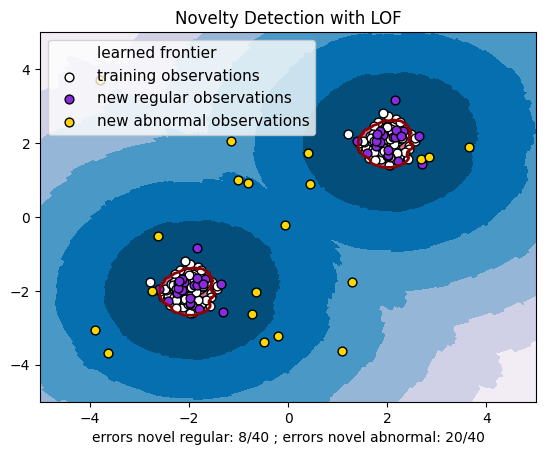

In [11]:
# plot the learned frontier, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection with LOF")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_test, n_error_outliers)
)
plt.show()